KNN

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
data=pd.read_csv("dataset_4_shipment_model.csv")

In [10]:
data.columns = data.columns.str.replace('number_orders','number_items')

In [11]:
data

,order_id,number_items,number_products,number_seller,max_distance,op_carrier,product_weight_gr,mean_distance,actual_wait
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,1,9144.266345,6.0,650.0,9144.266345,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,1,1,10513.888384,8.0,30000.0,10513.888384,16.0
2,000229ec398224ef6ca0657da4fc703e,1,1,1,2136.253098,1.0,3050.0,2136.253098,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,1,1,5056.786406,2.0,200.0,5056.786406,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,11329.586369,11.0,3750.0,11329.586369,25.0
...,...,...,...,...,...,...,...,...,...
76699,fffbee3b5462987e66fb49b1c5411df2,1,1,1,6180.268603,10.0,1050.0,6180.268603,16.0
76700,fffc94f6ce00a00581880bf54a75a037,1,1,1,651.543193,1.0,10150.0,651.543193,17.0
76701,fffcd46ef2263f404302a634eb57f7eb,1,1,1,11437.146886,2.0,8950.0,11437.146886,9.0
76702,fffce4705a9662cd70adb13d4a31832d,1,1,1,11437.146886,2.0,967.0,11437.146886,4.0


In [12]:
data.drop("mean_distance", axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76704 entries, 0 to 76703
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           76704 non-null  object 
 1   number_items       76704 non-null  int64  
 2   number_products    76704 non-null  int64  
 3   number_seller      76704 non-null  int64  
 4   max_distance       76704 non-null  float64
 5   op_carrier         76704 non-null  float64
 6   product_weight_gr  76704 non-null  float64
 7   actual_wait        76704 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.7+ MB


In [14]:
data.isna().sum()

order_id             0
number_items         0
number_products      0
number_seller        0
max_distance         0
op_carrier           0
product_weight_gr    0
actual_wait          0
dtype: int64

In [15]:
data=data.dropna()

In [16]:
data

,order_id,number_items,number_products,number_seller,max_distance,op_carrier,product_weight_gr,actual_wait
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,1,9144.266345,6.0,650.0,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,1,1,10513.888384,8.0,30000.0,16.0
2,000229ec398224ef6ca0657da4fc703e,1,1,1,2136.253098,1.0,3050.0,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,1,1,5056.786406,2.0,200.0,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,11329.586369,11.0,3750.0,25.0
...,...,...,...,...,...,...,...,...
76699,fffbee3b5462987e66fb49b1c5411df2,1,1,1,6180.268603,10.0,1050.0,16.0
76700,fffc94f6ce00a00581880bf54a75a037,1,1,1,651.543193,1.0,10150.0,17.0
76701,fffcd46ef2263f404302a634eb57f7eb,1,1,1,11437.146886,2.0,8950.0,9.0
76702,fffce4705a9662cd70adb13d4a31832d,1,1,1,11437.146886,2.0,967.0,4.0


In [18]:
# Define the x and the y
#X= number orders, number products, number sellers, max distance, op carrier, product weight
#y actual wait

X = data.iloc[:,1:7].values
y = data.iloc[:, 7].values

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [21]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [23]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [24]:
print(mean_absolute_error(y_test,y_pred)) #misses of 6.4 days

6.403233166025683


In [25]:
print(mean_squared_error(y_test,y_pred)) #rmse = 10% 

108.71286096082393


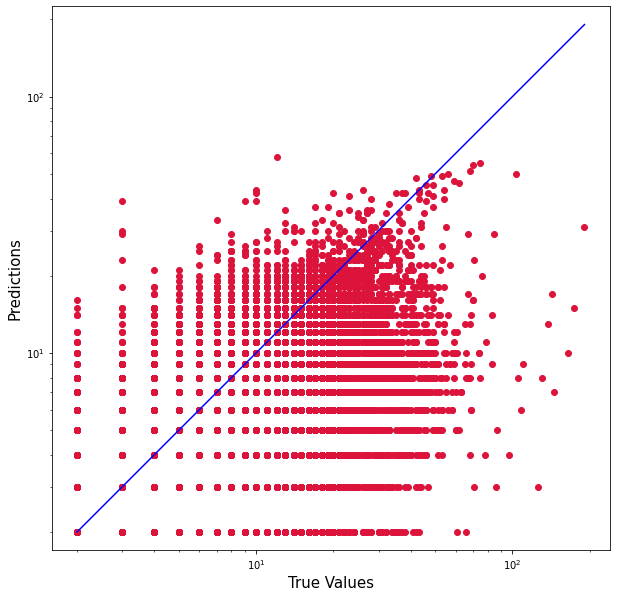

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()